# Import nesscessary libraries for analysis and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read dataset and show the top 5 rows?

In [2]:
data = pd.read_csv('911.csv')

In [3]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Types of Attributes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


## Convert timestamp into datatime datatype

In [5]:
data['timeStamp']=pd.to_datetime(data['timeStamp'],format=("%Y-%m-%d %H:%M:%S"))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.1+ MB


In [7]:
total = data['title'].value_counts()

In [8]:
total

Traffic: VEHICLE ACCIDENT -             98401
Traffic: DISABLED VEHICLE -             31871
Fire: FIRE ALARM                        24380
EMS: FALL VICTIM                        21253
EMS: RESPIRATORY EMERGENCY              21158
EMS: CARDIAC EMERGENCY                  20616
EMS: VEHICLE ACCIDENT                   16928
Traffic: ROAD OBSTRUCTION -             14134
EMS: SUBJECT IN PAIN                    12001
EMS: HEAD INJURY                        11102
EMS: UNKNOWN MEDICAL EMERGENCY           7170
Fire: VEHICLE ACCIDENT                   7153
EMS: SYNCOPAL EPISODE                    7085
EMS: GENERAL WEAKNESS                    7069
EMS: SEIZURES                            6946
EMS: ALTERED MENTAL STATUS               6184
EMS: MEDICAL ALERT ALARM                 6017
Fire: FIRE INVESTIGATION                 5955
EMS: ABDOMINAL PAINS                     5802
EMS: UNCONSCIOUS SUBJECT                 5373
EMS: HEMORRHAGING                        5264
EMS: OVERDOSE                     

In [9]:
def eMs(x):
    x = (x.split(":")[0])
    return(x)
    

In [10]:
data['reason_category'] = data['title'].apply(eMs)

In [11]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
data['reason_category'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason_category, dtype: int64

In [13]:
data['Year'] = data['timeStamp'].apply(lambda x: x.year)

In [14]:
data['Month'] = data['timeStamp'].apply(lambda x: x.month)

In [15]:
data['date'] = data['timeStamp'].apply(lambda x : x.date())

In [16]:
data["day of week"] =data["timeStamp"].apply(lambda x : x.dayofweek)

In [17]:
data['time'] = data['timeStamp'].apply(lambda x: x.time())

In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_category,Year,Month,date,day of week,time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,2015-12-10,3,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,2015-12-10,3,17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,2015-12-10,3,14:39:21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,12,2015-12-10,3,16:47:36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,12,2015-12-10,3,16:56:52


In [19]:
data['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
EMS: RESPIRATORY EMERGENCY     21158
Name: title, dtype: int64

In [20]:
dow = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs" , 4:"Fri", 5:"Sat", 6:"Sun" }

data["Day of Week"] = data["day of week"].map(dow)


In [21]:
data["day/night"] = data["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")

In [22]:
data.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_category,Year,Month,date,day of week,time,Day of Week,day/night
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,2015-12-10,3,17:10:52,Thurs,day


##  Data Visualization on dataset

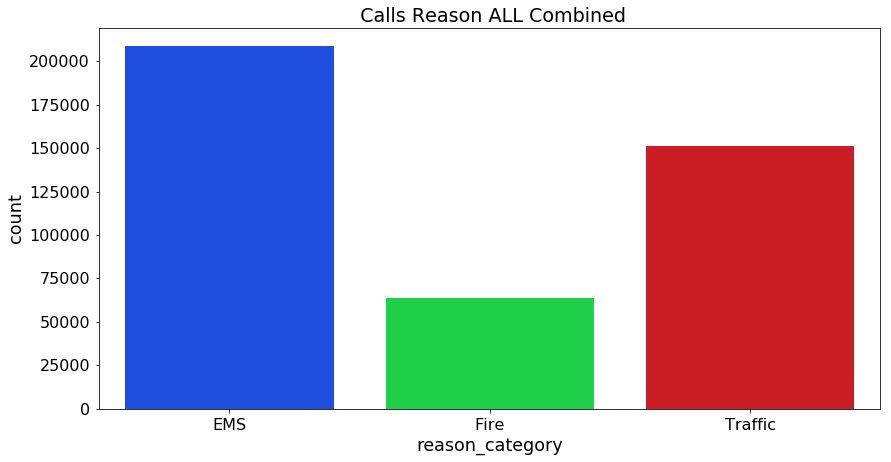

In [23]:
# Plot for Category of reasons:

plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "reason_category", data= data, palette="bright")
plt.title(" Calls Reason ALL Combined")
plt.show()


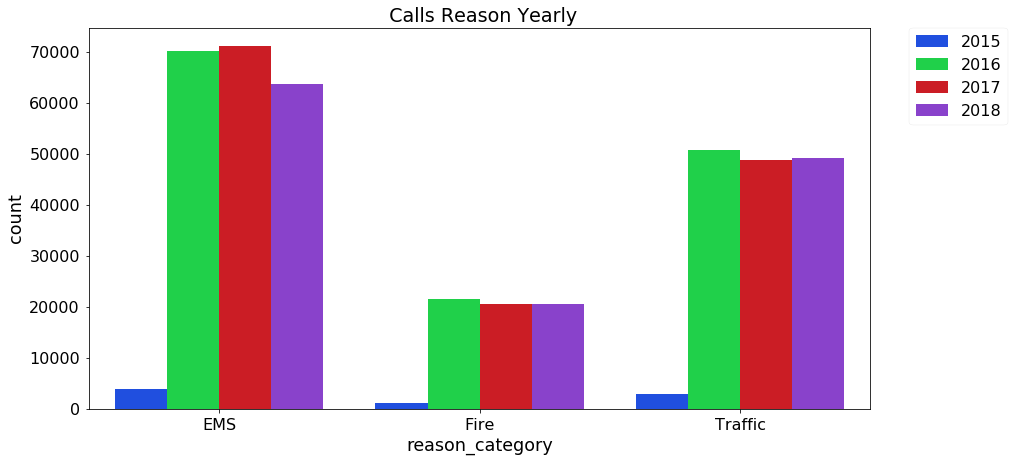

In [24]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "reason_category", data= data, palette="bright" ,hue= "Year")
plt.title(" Calls Reason Yearly")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

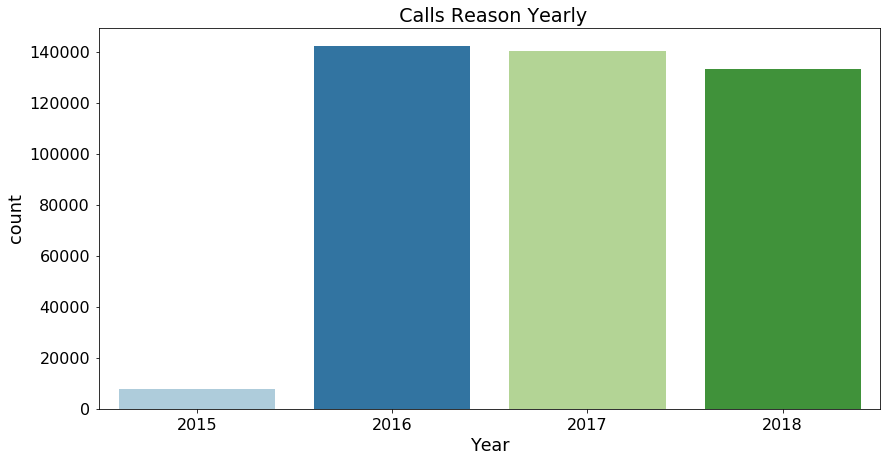

In [25]:
plt.figure(figsize=(14,7))
sns.set_context("paper",font_scale =2)
sns.countplot(x= "Year", data= data, palette="Paired")
plt.title(" Calls Reason Yearly")
plt.show()

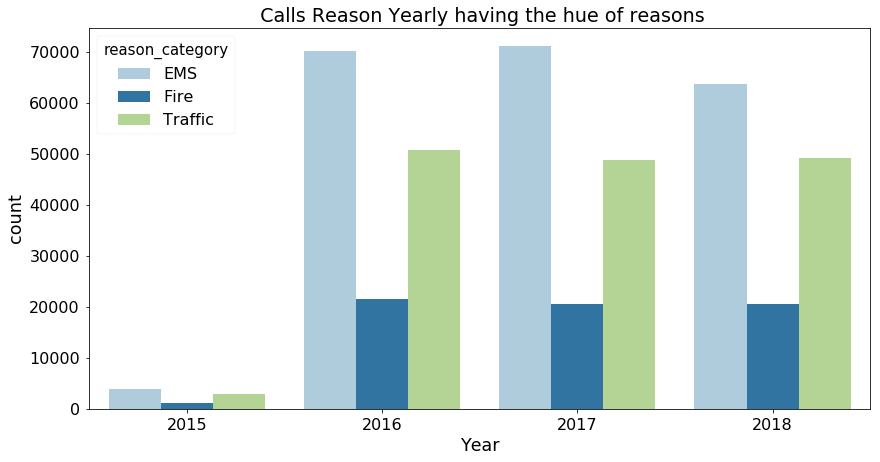

In [26]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Year", data= data, palette="Paired", hue = "reason_category")
plt.title(" Calls Reason Yearly having the hue of reasons")
plt.show()

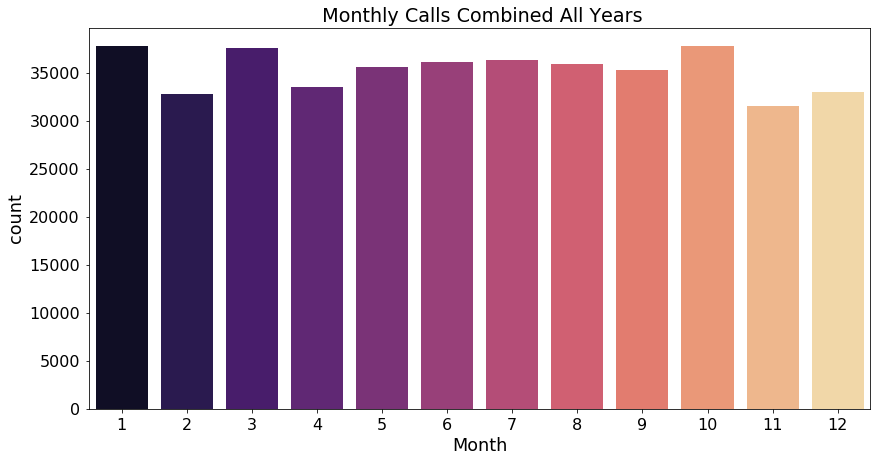

In [27]:
# Plot for calls recieved monthly combined of all years:
plt.figure(figsize=(14,7))

sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Month", data= data, palette="magma")

plt.title(" Monthly Calls Combined All Years")
plt.show()


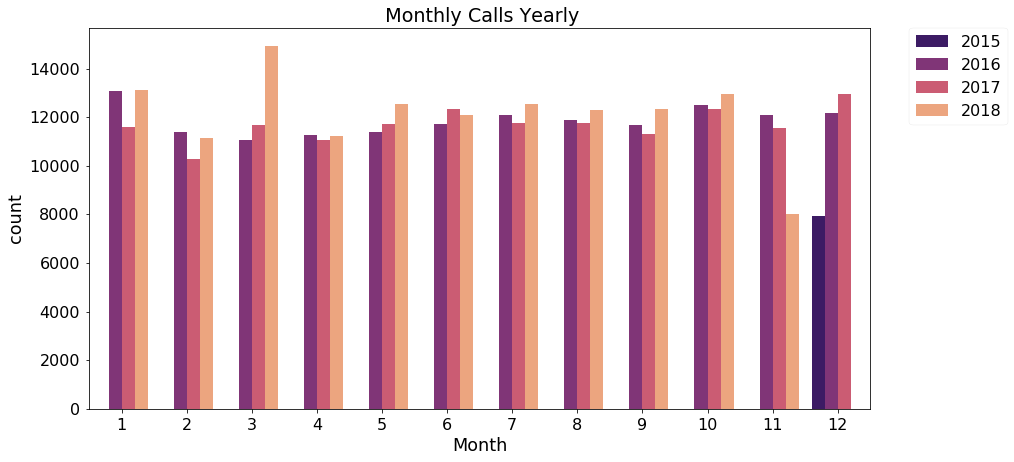

In [28]:
plt.figure(figsize = (14,7))

sns.set_context("paper", font_scale=2)
sns.countplot(data= data, x= "Month", hue= "Year", palette="magma")

plt.title(" Monthly Calls Yearly")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

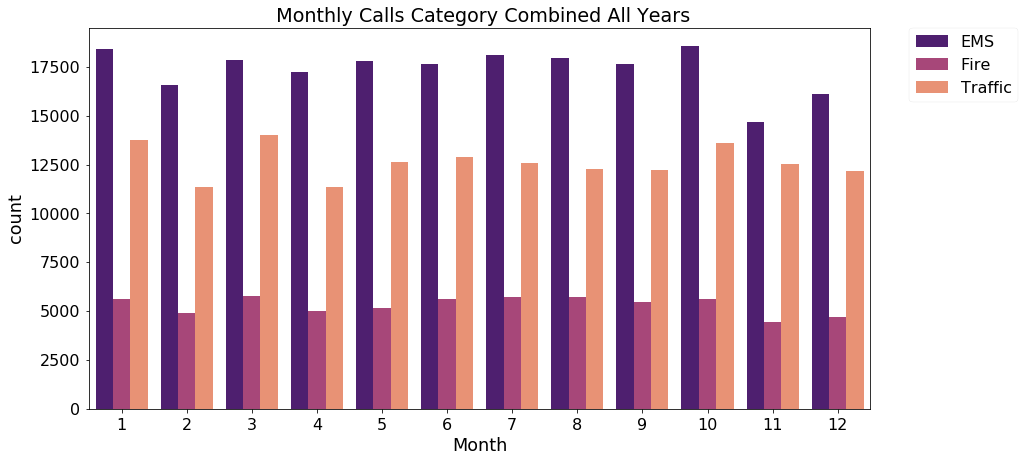

In [29]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Month", data= data, palette="magma", hue= "reason_category")
plt.title(" Monthly Calls Category Combined All Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

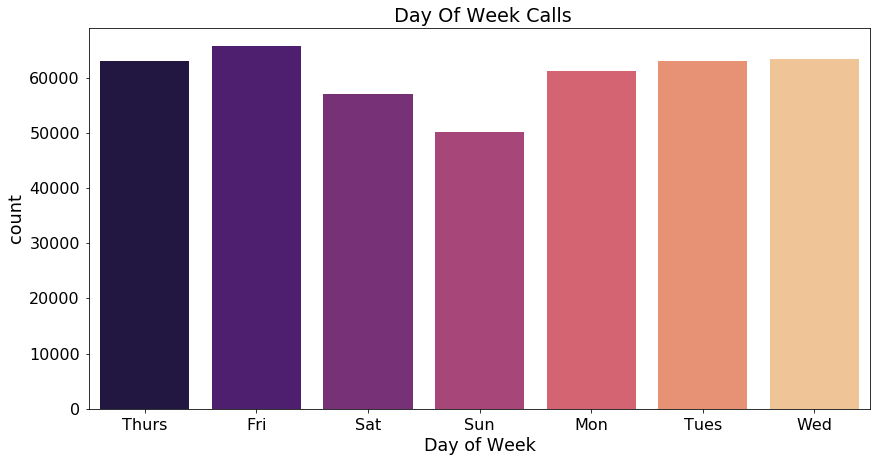

In [30]:
# Calls report Daily: 

plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= data, palette="magma")
plt.title(" Day Of Week Calls")
plt.show()

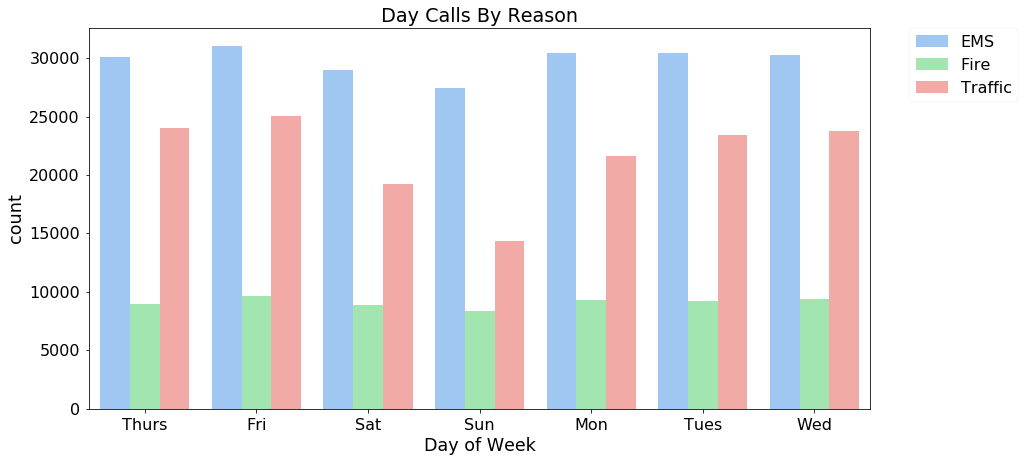

In [31]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= data, palette="pastel", hue= ("reason_category") )     
plt.title(" Day Calls By Reason ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

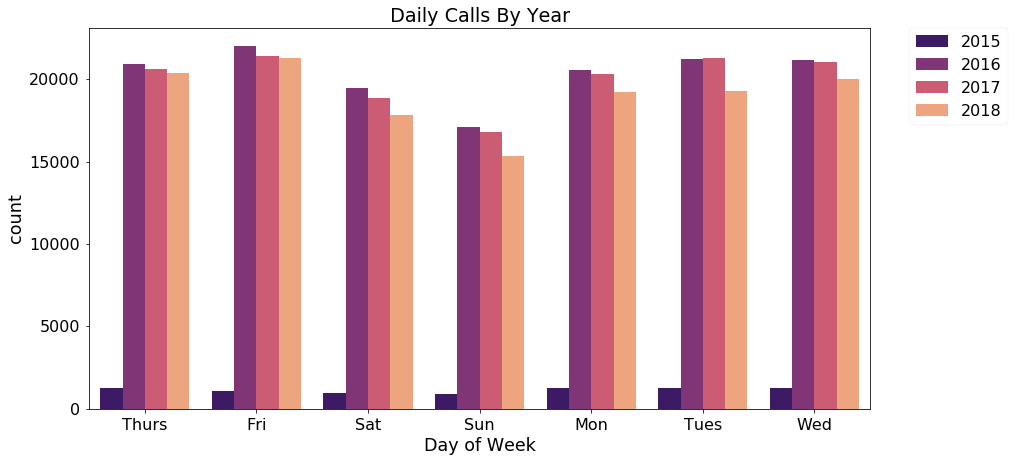

In [32]:
plt.figure(figsize=(14,7))
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Day of Week", data= data, palette="magma", hue= "Year" )     
plt.title(" Daily Calls By Year ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [33]:
data.groupby("Year").count()
# this will return a df having Years as its index

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_category,Month,date,day of week,time,Day of Week,day/night
Year,,,,,,,,,,,,,,,,
2015,7916,7916,7916,6902,7916,7916,7911,7916,7916,7916,7916,7916,7916,7916,7916,7916
2016,142360,142360,142360,124495,142360,142360,142317,142360,142360,142360,142360,142360,142360,142360,142360,142360
2017,140343,140343,140343,123768,140343,140343,140288,140343,140343,140343,140343,140343,140343,140343,140343,140343
2018,133290,133290,133290,116615,133290,133290,133234,133290,133290,133290,133290,133290,133290,133290,133290,133290
